# Extract magnetization

In [1]:
from mammos_spindynamics.db import get_M

For the moment we only have one material: `CrNiP`. This is present in the database OQMD with label icsd-600596.

So two possible retrieval methods are:
- Loading the material with formula `CrNiP` without specifying any `structure` or `spacegroup` (since it is the only one available).
- Querying the OQMD label directly.

In [2]:
M = get_M(formula="CrNiP")

Loaded material.
Chemical Formula: CrNiP
Structure: 92390
Spacegroup: P-62m
OQMD_label: icsd-600596


In [3]:
M = get_M(OQMD_label="icsd-600596")

Loaded material.
Chemical Formula: CrNiP
Structure: 92390
Spacegroup: P-62m
OQMD_label: icsd-600596


## What if we try to load a material with wrong structure?

In [4]:
get_M(formula="CrNiP", structure="12345")  # LookupError

LookupError: Requested material not found in database.

## What is `M`?

In [5]:
type(M)

scipy.interpolate._interpolate.interp1d

The table we have loaded looks like this:

In [6]:
import polars as pl

pl.Config.set_tbl_rows(-1)

df = pl.read_csv("../src/mammos_spindynamics/db/0001.csv")
df

Temp,Mavg,UBinder,Susc,Cv
i64,f64,f64,f64,f64
2,0.00113,0.652283,0.000438,0.706795
5,0.000749,0.59551,0.000404,0.721321
10,0.000373,0.445532,0.000157,0.709296
50,0.001017,0.484349,0.000204,0.53705
100,0.001091,0.450856,0.00013,0.425501
150,0.001307,0.431014,0.000134,0.427016
200,0.00152,0.445906,0.000129,0.428251
250,0.001692,0.456053,0.000127,0.458719
300,0.001842,0.461996,0.00012,0.475327


`M` is the linear interpolating function. We can recover the `x` values with:

In [7]:
M.x

array([  2,   5,  10,  50, 100, 150, 200, 250, 300, 400, 500, 600, 700])

and the `y` values with:

In [8]:
M.y

array([0.00113 , 0.000749, 0.000373, 0.001017, 0.001091, 0.001307,
       0.00152 , 0.001692, 0.001842, 0.002092, 0.002304, 0.002426,
       0.0025  ])

Then, we can evaluate it at any other point inside the interval defined by min(`x`) and max(`x`):

In [9]:
M(450)

array(0.002198)

In [10]:
M(1)  # ValueError

ValueError: A value (1.0) in x_new is below the interpolation range's minimum value (2).

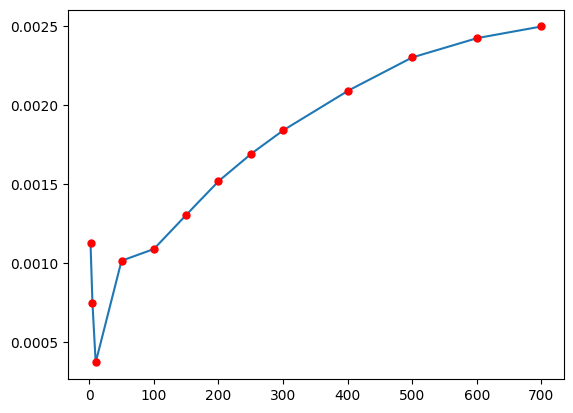

In [11]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.arange(2, 700, 1)
yy = M(xx)

plt.plot(xx, yy)
plt.plot(M.x, M.y, "o", color="red", markersize=5)

## What if we used quadratic interpolation?

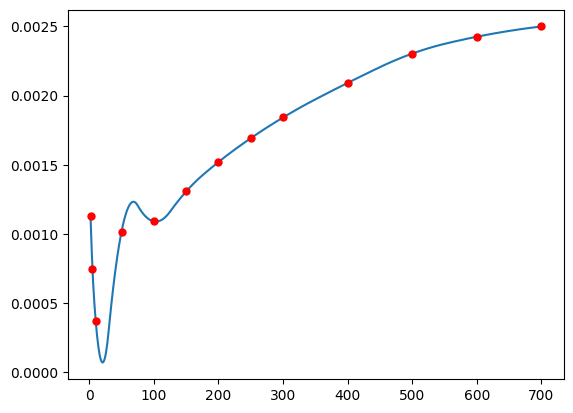

In [12]:
from scipy.interpolate import interp1d

M2 = interp1d(df["Temp"], df["Mavg"], kind="quadratic")

yy2 = M2(xx)
plt.plot(xx, yy2)
plt.plot(M2.x, M2.y, "o", color="red", markersize=5)